# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

Mental health. It is a topic that, while accepted moreso now, has aspects that are still underlooked. While some people can easily reach out and recognize their own poor mental health, others are too anxious or don't even attempt to reach out. This is very impactful for me personally along with many others I have met.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

How prominent is poor mental health?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

Very common would be the easiest and shortest answer. 

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->
    'https://www.kaggle.com/osmi/mental-health-in-tech-survey',
    'https://www.kaggle.com/datasets/reenapinto/mental-health-care?select=Mental_Health_Care_in_the_Last_4_Weeks.csv',
    'https://www.kaggle.com/datasets/jeevanaduwarahan/student-mental-health',
    'https://www.kaggle.com/datasets/kashishnaqvi/suicidal-behaviours-among-adolescents'


These datasets will help answer the question of the prominence of mental health and how it should be looked into more in several areas.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

My approach is simple. The Kaggle datasets provide huge insights on a global and smaller scale. This includes a bunch of different angles too, like in tech, students, adolescents, etc.

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configure pandas to display 500 rows; otherwise it will truncate the output
pd.set_option('display.max_rows', 500)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

In [90]:
import opendatasets as od
import pandas as pd

# Define the list of datasets
datasets = [
    'https://www.kaggle.com/osmi/mental-health-in-tech-survey',
    'https://www.kaggle.com/datasets/reenapinto/mental-health-care?select=Mental_Health_Care_in_the_Last_4_Weeks.csv',
    'https://www.kaggle.com/datasets/jeevanaduwarahan/student-mental-health',
    'https://www.kaggle.com/datasets/kashishnaqvi/suicidal-behaviours-among-adolescents',
    'https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health'
]

# Download datasets using opendatasets
for dataset_url in datasets:
    od.download(dataset_url, force=True)

# Read datasets into pandas data frames
health_in_tech = pd.read_csv('mental-health-in-tech-survey/survey.csv')
us_mental_health_care = pd.read_csv('mental-health-care/Mental_Health_Care_in_the_Last_4_Weeks.csv')
student_mental_health = pd.read_csv('student-mental-health/Student Mental health.csv')
suicidal_behaviors = pd.read_csv('suicidal-behaviours-among-adolescents/GHSH_Pooled_Data1.csv')
health_in_social_media = pd.read_csv('social-media-and-mental-health/smmh.csv')

# Print the first few rows of each data frame
print(health_in_tech.head())


100%|██████████| 48.8k/48.8k [00:00<00:00, 1.25MB/s]

100%|██████████| 166k/166k [00:00<00:00, 1.51MB/s]

100%|██████████| 1.32k/1.32k [00:00<00:00, 1.35MB/s]

100%|██████████| 20.3k/20.3k [00:00<00:00, 868kB/s]

100%|██████████| 10.7k/10.7k [00:00<00:00, 6.64MB/s]


             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1

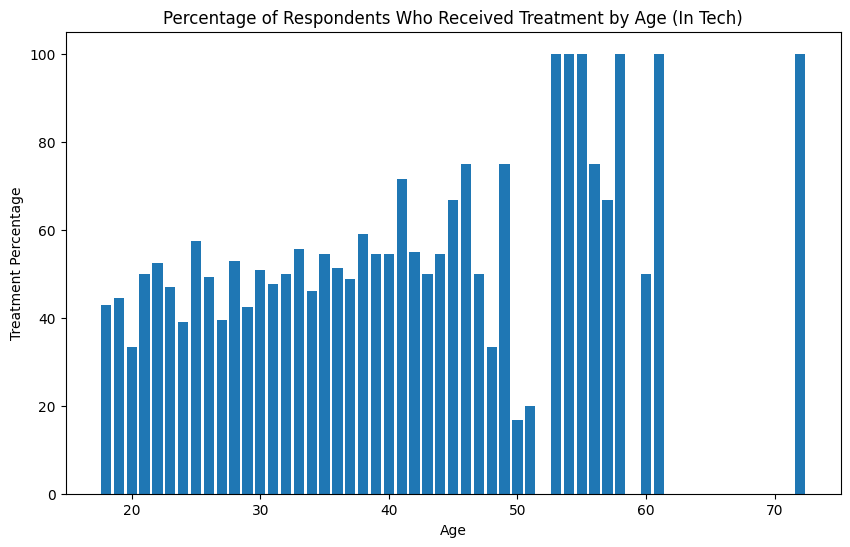

In [50]:
import matplotlib.pyplot as plt

# Filter the data for respondents aged 18 to 72
age_filtered_data = health_in_tech[health_in_tech['Age'].between(18, 72)]

# Group the data by age and calculate the percentage of respondents who received treatment
treatment_by_age = age_filtered_data.groupby('Age')['treatment'].value_counts(normalize=True).unstack().fillna(0)
treatment_by_age = treatment_by_age.loc[:, 'Yes'] * 100  # Select only the 'Yes' column and multiply by 100

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(treatment_by_age.index, treatment_by_age)
plt.xlabel('Age')
plt.ylabel('Treatment Percentage')
plt.title('Percentage of Respondents Who Received Treatment by Age (In Tech)')
plt.show()

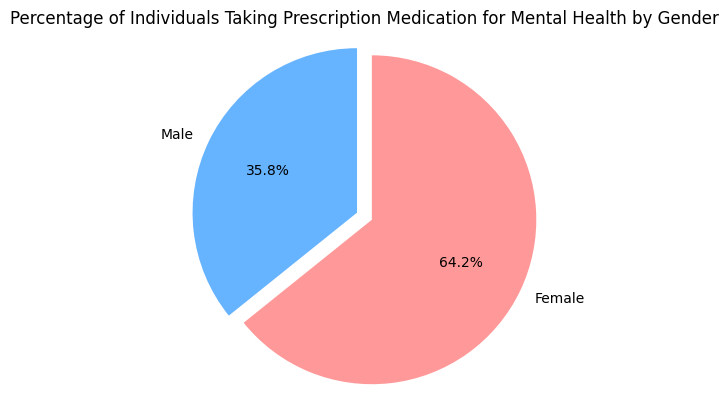

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('mental-health-care/Mental_Health_Care_in_the_Last_4_Weeks.csv')

# Filter the data to include only the necessary columns
gender_df = df[df['Group'] == 'By Sex'][['Subgroup', 'Value']]
male_percentage = gender_df.loc[gender_df['Subgroup'] == 'Male', 'Value'].values[0]
female_percentage = gender_df.loc[gender_df['Subgroup'] == 'Female', 'Value'].values[0]

# Creating a pie chart
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # To emphasize the first slice (Male)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Percentage of Individuals Taking Prescription Medication for Mental Health by Gender')

plt.show()

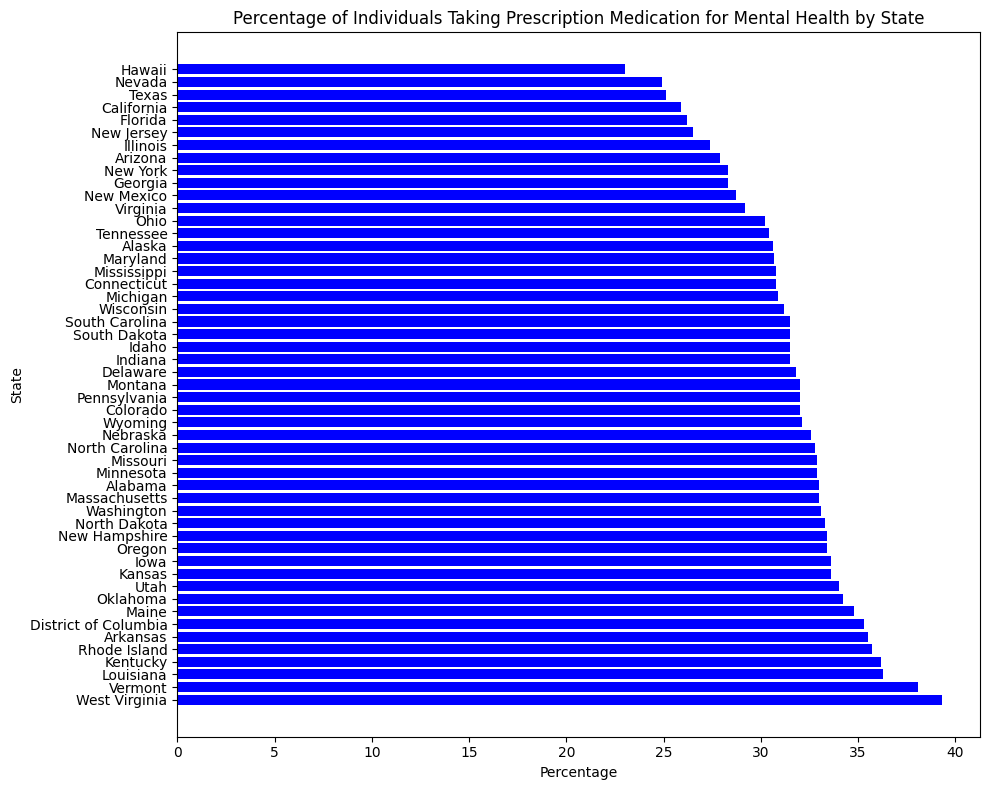

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('mental-health-care/Mental_Health_Care_in_the_Last_4_Weeks.csv')

# Filter the data to include only the necessary columns
state_df = df[df['Group'] == 'By State'][['Subgroup', 'Value']]

# Sort the data by value in descending order
state_df = state_df.sort_values(by='Value', ascending=False)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(state_df['Subgroup'], state_df['Value'], color='blue')

plt.xlabel('Percentage')
plt.ylabel('State')
plt.title('Percentage of Individuals Taking Prescription Medication for Mental Health by State')

plt.tight_layout()
plt.show()

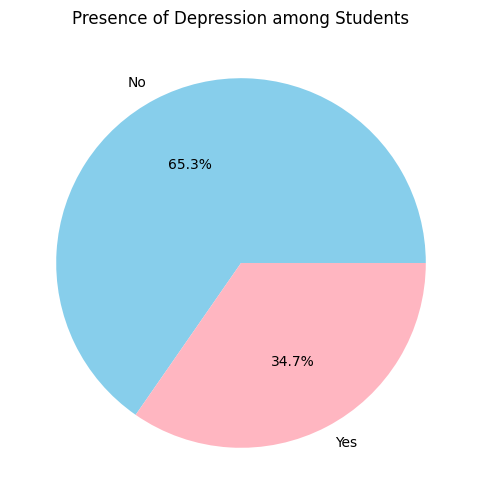

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('student-mental-health/Student Mental health.csv')

# Count the presence of depression among students
depression_counts = df['Do you have Depression?'].value_counts()
labels = ['No', 'Yes']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(depression_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightpink'])

plt.title('Presence of Depression among Students')

plt.show()

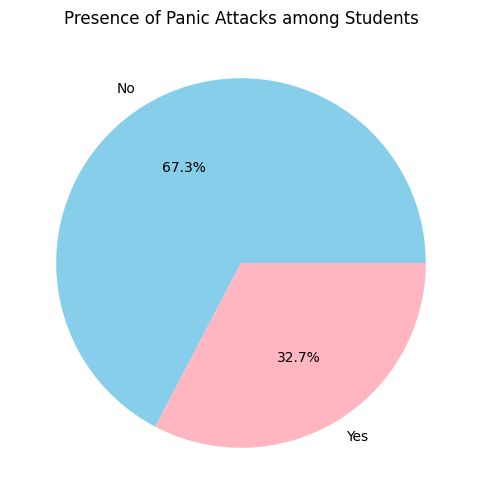

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('student-mental-health/Student Mental health.csv')

# Count the presence of panic attacks among students
panic_counts = df['Do you have Panic attack?'].value_counts()
labels = ['No', 'Yes']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(panic_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightpink'])

plt.title('Presence of Panic Attacks among Students')

plt.show()

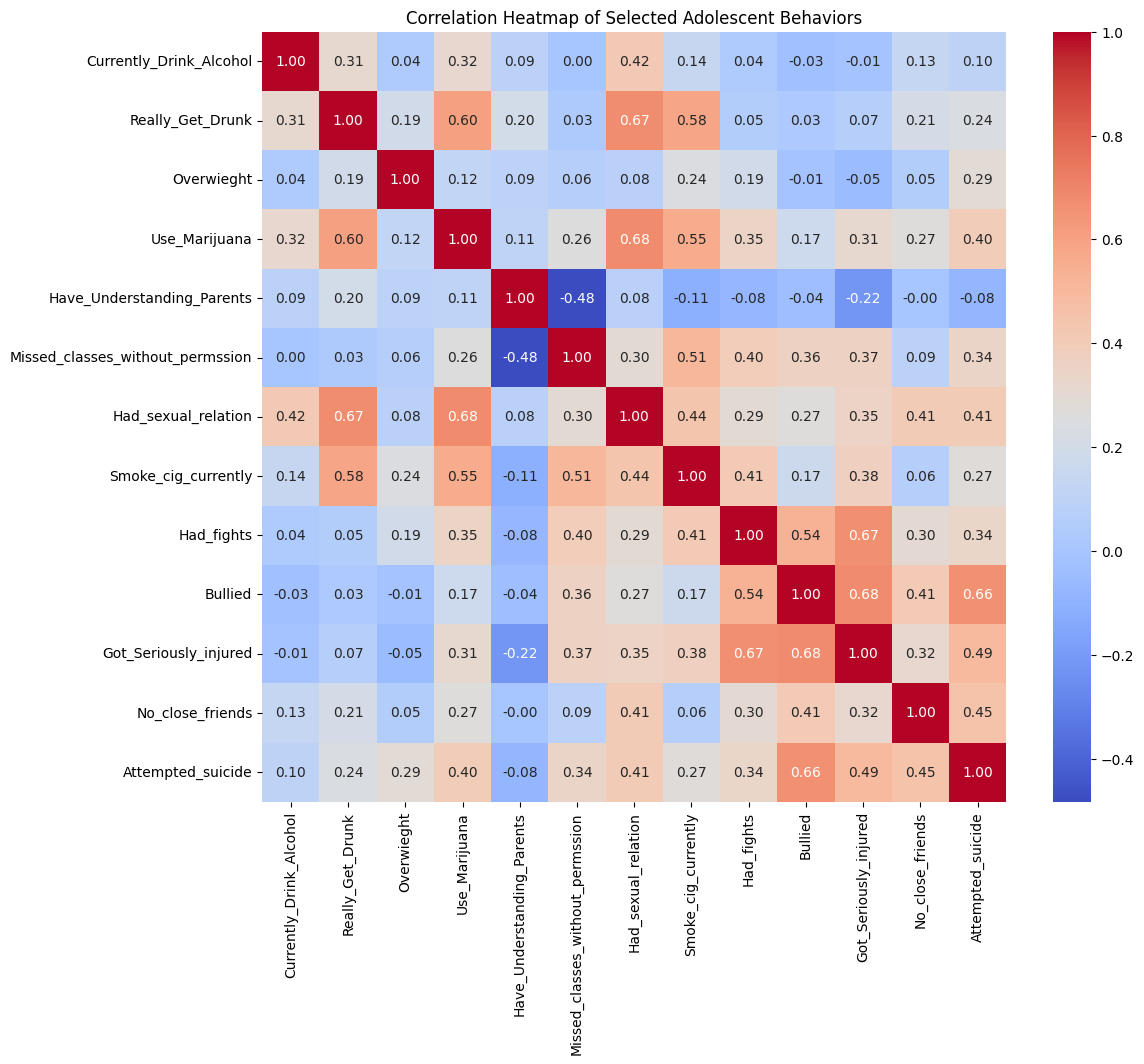

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = suicidal_behaviors

# Selecting columns for correlation analysis
selected_columns = ['Currently_Drink_Alcohol', 'Really_Get_Drunk', 'Overwieght', 'Use_Marijuana',
                    'Have_Understanding_Parents', 'Missed_classes_without_permssion', 'Had_sexual_relation',
                    'Smoke_cig_currently', 'Had_fights', 'Bullied', 'Got_Seriously_injured',
                    'No_close_friends', 'Attempted_suicide']

# Filter the data with selected columns
selected_data = data[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Visualization 2: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Adolescent Behaviors')
plt.show()

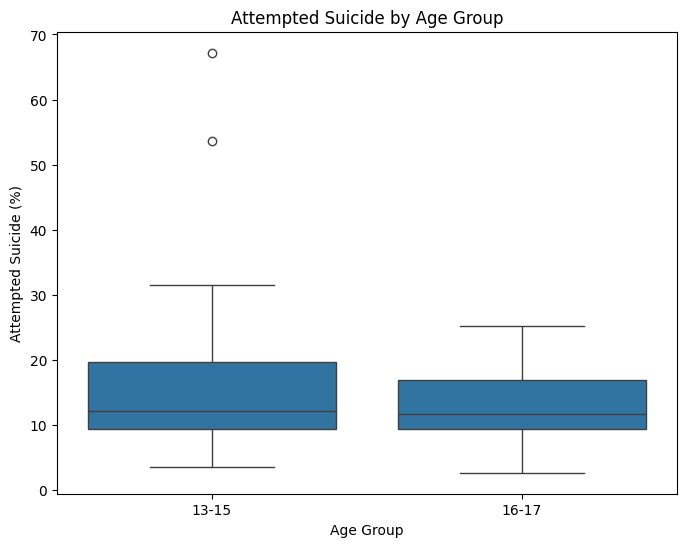

In [49]:
data = suicidal_behaviors
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age Group', y='Attempted_suicide', data=data)
plt.title('Attempted Suicide by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attempted Suicide (%)')
plt.show()

C:\Users\Starman\AppData\Local\Temp\ipykernel_14428\1383719209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_mental_health['Time Spent on Social Media'] = time_mental_health['Time Spent on Social Media'].str.extract(r'(\d+)').astype(float)
C:\Users\Starman\AppData\Local\Temp\ipykernel_14428\1383719209.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mental Health Consequence', y='Time Spent on Social Media', data=time_mental_health.dropna(), palette='viridis')


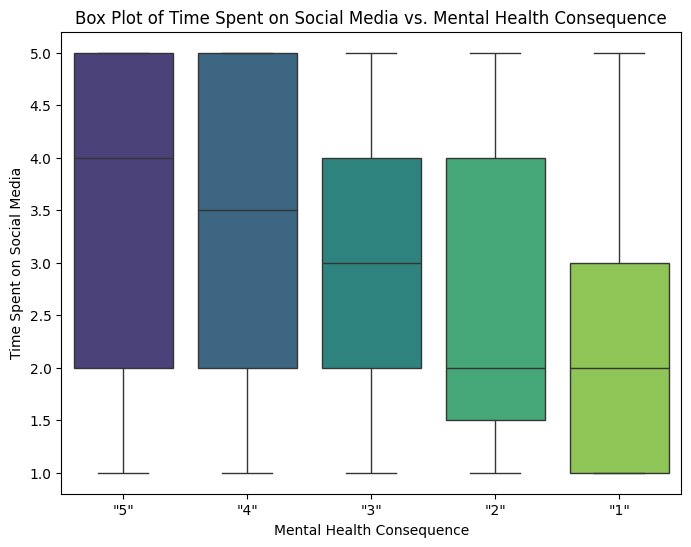

In [113]:
# Extracting columns for time spent on social media and mental health consequence
time_mental_health = health_in_social_media[['"8. What is the average time you spend on social media every day?"', '"18. How often do you feel depressed or down?"']]
time_mental_health.columns = ['Time Spent on Social Media', 'Mental Health Consequence']

# Converting time spent on social media to numeric
time_mental_health['Time Spent on Social Media'] = time_mental_health['Time Spent on Social Media'].str.extract(r'(\d+)').astype(float)

# Plotting the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Mental Health Consequence', y='Time Spent on Social Media', data=time_mental_health.dropna(), palette='viridis')
plt.xlabel('Mental Health Consequence')
plt.ylabel('Time Spent on Social Media')
plt.title('Box Plot of Time Spent on Social Media vs. Mental Health Consequence')
plt.show()

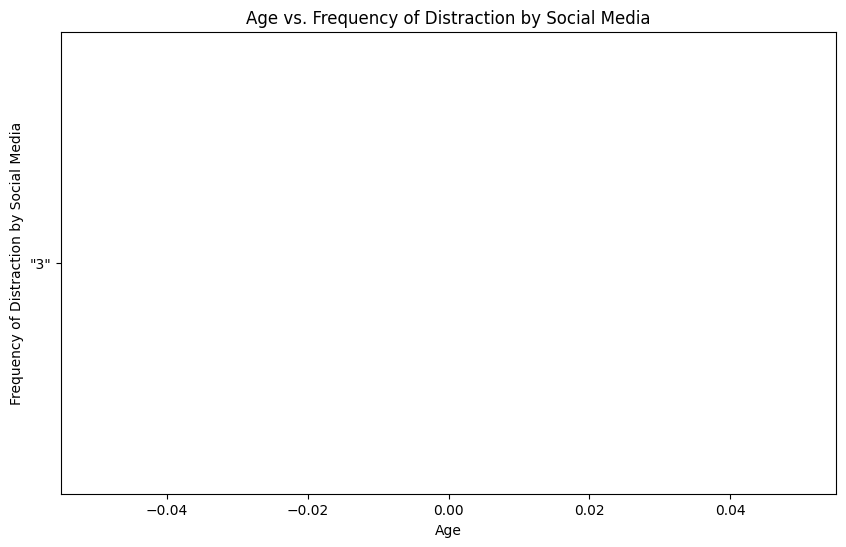

In [151]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='"1. What is your age?"', y='"10. How often do you get distracted by Social media when you are busy doing something?"', data=health_in_social_media)
plt.xlabel('Age')
plt.ylabel('Frequency of Distraction by Social Media')
plt.title('Age vs. Frequency of Distraction by Social Media')
plt.show()

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = health_in_tech

# Selecting features and target variable
features = ["Age", "Gender", "Country", "self_employed", "family_history", "treatment", "work_interfere", 
            "no_employees", "remote_work", "tech_company", "benefits", "care_options", "wellness_program", 
            "seek_help", "anonymity", "leave", "mental_health_consequence", "phys_health_consequence", 
            "coworkers", "supervisor", "mental_health_interview", "phys_health_interview", 
            "mental_vs_physical", "obs_consequence"]

target = "Age"  # Replace 'comments' with the actual target variable you want to predict

# Filtering features and target variable
data_filtered = data[features + [target]]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_filtered.drop(target, axis=1), 
                                                    data_filtered[target], 
                                                    test_size=0.2, random_state=42)

# Preprocessing categorical features and handling missing values
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating the linear regression model pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

# Training the model
lr_pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_pipeline.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 5.219760185735405e+16
R-squared Score: -4261854858590.1587


## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

Kaggle only.

Charts:

Percentage of Respondents Who Received Treatment by Age (In Tech):
Interesting to see the variety in when people get treatment. Should they get it sooner? 

Percentage of Individuals Taking Prescription Medication for Mental Health by Gender:
This can be intepreted a lot of different ways, but theoretically, this should be 50/50 and not so onesided. This is very important to look at!

Percentage of Individuals Taking Prescription Medication for Mental Health by State:
I think its interesting to analyze this statewide and how different it is state to state. This makes me ask a lot of whys. Why is Hawaii the least amount? Why is West Virginia the most? 

Presence of Depression among Students:
This was made to show how common depression is. While it may seem like a "low" statistic, that is 1/3 people from what I gathered here.

Presence of Panic Attacks among Students:
Done for a similar reason as above. This shows how panic attacks probably tie into depression, and again, close to 1/3.

What insights and interesting information are you able to extract at this stage?
Pretty much relations with age/gender/location with mental health.
What are the distributions of my variables?
Very interesting, they seem to line in with eachother even across different datasets.
Are there any correlations between my variables?
Yes! Several. Mainly between gender and age.
What issues can you see in your data at this point?
Not much.
Are there any outliers or anomalies? are they relevant to your analysis? or should they be removed?
From what I can tell no, data seems pretty consistent with eachother.
Are there any missing values? how are you going to deal with them?
No.
Are there any duplicate values? how are you going to deal with them?
No.
Are there any data types that need to be changed?
I had to go through different sets of data, but other than that no.

Missing values
Duplicate values
Anomalies and Outliers
Data types transformation.
You will need to describe the data cleaning process you went through to prepare your data for analysis. This includes your code and the reasoning behind your decisions:

So mainly the trouble I ran into was data not being able to be read for some reason. The columns were frequently not aligned and python was therefore not able to interact with the data. There was also some innapropriate joke answers on some data .csvs that had to be removed. A lot of this could be done manually as the data was so small from some. There werent many outliers from the data I pulled, except a few on the tech one which I removed.


Machine Learning Plan and Process:

What type of machine learning model are you planning to use?
Logistic Regression.

What are the challenges have you identified/are you anticipating in building your machine learning model? How are you planning to address these challenges?
Even though I only need one, I think the process is something that will take me the longest out of everything here. Mainly because of my inexperience, but I will look back on the assignment focusing on it to fully complete this one.

Ask: Can we predict the severity of depressive symptoms based on various factors such as age, gender, lifestyle habits, and social interactions?
Prepare: Select relevant features such as age, gender, exercise habits, social interaction frequency from a dataset(s). Using a stratified split. This split makes it more balanced and consistent with a more realistic estimation in prediction.
Process: Explore the dataset to identify missing values, outliers, and potential biases using scikit-learn.
Analyze: Utilize linear regression as a baseline model to predict the severity of depressive symptoms based on selected features. Fit the model to the training data and analyze the coefficients to understand feature importance and their impact on mental health prediction.
Evaluate: Assess the performance of the linear regression model using appropriate metrics.
Share: Emphasize the need for further research and the importance of considering multiple factors in mental health prediction models.

Prior Feedback and Updates
What feedback did you receive from your peers and/or the teaching team?
I had 6 data sets at the time which was praused and he reminded me to do the !jupyter convert.
What changes have you made to your project based on this feedback?
I made sure to do the convert. Woops!

In [33]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 8463 bytes to source.py
